In [ ]:
import pickle
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.nmf import Nmf
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to the pickle file
pickle_file = '/content/drive/MyDrive/RDS/RDSY2S3/BMCS2123-NATURAL LANGUAGE PROCESSING/Assignment/processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    df = pickle.load(file)

In [ ]:
# Define the path to the pickle file
pickle_file = 'processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    df = pickle.load(file)

In [ ]:
# Define the path to the pickle file
pickle_file = '/content/drive/MyDrive/RDS/RDSY2S3/BMCS2123-NATURAL LANGUAGE PROCESSING/Assignment/test_processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    test_data = pickle.load(file)

In [ ]:
# Define the path to the pickle file
pickle_file = 'test_processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    test_data = pickle.load(file)

In [ ]:
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,TITLE_len,ABSTRACT_len,title,abstract
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,4,265,"[reconstruct, effect, map]","[predictive, model, allow, inference, analyze,..."
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,4,76,"[rotation, invariance, neural, network]","[rotation, invariance, translation, invariance..."
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,8,99,"[spherical, polyharmonics, poisson, kernels, p...","[introduce, develop, notion, spherical, polyha..."
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,9,110,"[finite, element, approximation, stochastic, m...","[stochastic, landau, lifshitz, gilbert, llg, e..."
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,20,125,"[comparative, study, discrete, wavelet, transf...","[ftir, spectra, sample, 7, plant, species, use..."


In [ ]:
df2 = df[['title', 'abstract']]
df2.head()

,title,abstract
0,"[reconstruct, effect, map]","[predictive, model, allow, inference, analyze,..."
1,"[rotation, invariance, neural, network]","[rotation, invariance, translation, invariance..."
2,"[spherical, polyharmonics, poisson, kernels, p...","[introduce, develop, notion, spherical, polyha..."
3,"[finite, element, approximation, stochastic, m...","[stochastic, landau, lifshitz, gilbert, llg, e..."
4,"[comparative, study, discrete, wavelet, transf...","[ftir, spectra, sample, 7, plant, species, use..."


In [ ]:
# Convert the text column to a list of lists of tokens
documents = df2['abstract'].tolist()

# Create a dictionary and bag-of-words corpus using Gensim
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

In [ ]:
abstract = df2['abstract']

#### Method 1: Range-Based Coherence Score Calculation with NMF
The highest coherence score is with 12 topics, but the elbow point is at 10. It means that while adding more topics may slightly improve the score, it might not make a big difference in how well the topics represent your data. So, 10 topics might be a good balance between simplicity and performance.

Since maximizing the coherence score is the main goal and can accommodate more complex models, the point with the highest coherence score will be chosen.

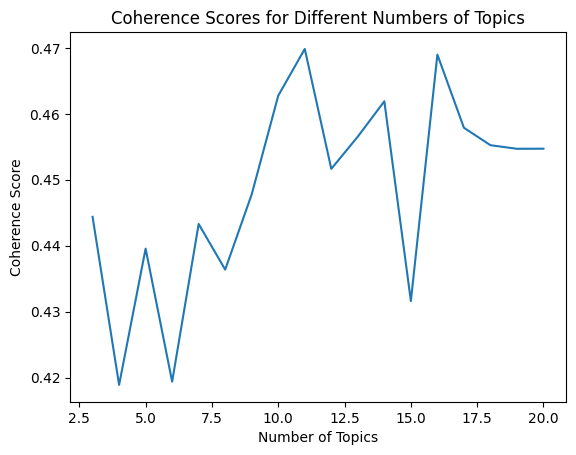

Elbow point (potential optimal number of topics): 15


In [ ]:
# Calculate coherence scores for different numbers of topics
min_topics = 3
max_topics = 20  # manual decided set a reasonably high value

coherence_values = []

for num_topics in range(min_topics, max_topics + 1):
    nmf_model = Nmf(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    # Generate topic coherence scores (not inherent in NMF, so using LDA coherence calculation method)
    coherence_model = CoherenceModel(model=nmf_model, texts=abstract, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

# Plot coherence scores
x = range(min_topics, max_topics + 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.show()

# Find the elbow point
differences = np.diff(coherence_values)
elbow_point = np.argmax(differences) + min_topics

print(f"Elbow point (potential optimal number of topics): {elbow_point}")


#### Method 2: Grid Search with Coherence Score Calculation using NMF

Training NMF model with 5 topics...
Coherence score for 5 topics: 0.4051767894559276
Training NMF model with 10 topics...
Coherence score for 10 topics: 0.4070715189201284
Training NMF model with 15 topics...
Coherence score for 15 topics: 0.418911207258123
Training NMF model with 20 topics...
Coherence score for 20 topics: 0.40175907500436947


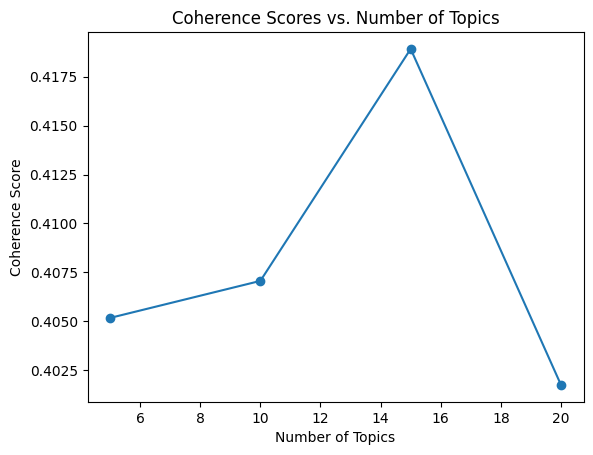

In [ ]:
# Define the range of topic numbers to try
topic_nums = list(np.arange(5, 20 + 1, 5))
coherence_scores = []

# Iterate over different numbers of topics
for num in topic_nums:
    print(f"Training NMF model with {num} topics...")
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        random_state=42  # Setting a random seed for reproducibility
    )

    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=documents,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_score = cm.get_coherence()
    coherence_scores.append(round(coherence_score, 5))

    print(f"Coherence score for {num} topics: {coherence_score}")

# Plot coherence scores
plt.plot(topic_nums, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores vs. Number of Topics")
plt.show()

#### Decision for using which method result of optimal number of topics
Consider the trade-off between model complexity and performance. Method 2, which offers a more comprehensive analysis using grid search, it benefits from a thorough examination of coherence scores across a specified range of topic numbers. This method enables for fine-tuning and optimisation of the topic model by systematically assessing coherence scores for each number of topics. While Method 2 requires more computational resources and time than Method 1, it provides a more in-depth analysis of model performance and may lead to the discovery of the optimal number of subjects for maximum coherence and relevance. Furthermore, the granularity afforded by Method 2 allows for better informed decisions regarding the trade-offs between model complexity and performance, it is resulting in a more refined and effective topic model.

### Model Training

In [ ]:
# Train an NMF model with the optimal number of topics
optimal_num_topics = 15
nmf_model = Nmf(corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=10)

### Topic Interpretation

In [ ]:
# Get the top words for each topic
topics = nmf_model.show_topics(num_topics=optimal_num_topics, num_words=10)

# Print the top words for each topic
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")

Topic 0: 0.048*"system" + 0.024*"systems" + 0.016*"time" + 0.013*"control" + 0.008*"paper" + 0.007*"design" + 0.007*"power" + 0.006*"present" + 0.006*"propose" + 0.005*"base"
Topic 1: 0.055*"function" + 0.050*"algorithm" + 0.032*"propose" + 0.015*"algorithms" + 0.012*"time" + 0.009*"base" + 0.009*"optimization" + 0.008*"number" + 0.007*"convergence" + 0.007*"stochastic"
Topic 2: 0.126*"data" + 0.013*"set" + 0.010*"analysis" + 0.007*"use" + 0.005*"process" + 0.005*"provide" + 0.004*"information" + 0.004*"cluster" + 0.004*"paper" + 0.004*"propose"
Topic 3: 0.017*"state" + 0.013*"field" + 0.012*"phase" + 0.010*"magnetic" + 0.009*"quantum" + 0.007*"study" + 0.007*"transition" + 0.007*"energy" + 0.006*"order" + 0.006*"effect"
Topic 4: 0.179*"model" + 0.007*"process" + 0.007*"parameters" + 0.005*"inference" + 0.004*"show" + 0.004*"bayesian" + 0.004*"dynamics" + 0.004*"two" + 0.004*"latent" + 0.004*"include"
Topic 5: 0.061*"image" + 0.020*"train" + 0.017*"use" + 0.014*"feature" + 0.012*"objec

### Topic Visualization

In [ ]:
# Filter out noise data from topics
def filter_topics(nmf_model, num_words=10, min_word_length=2):
    filtered_topics = []
    for topic_id in range(nmf_model.num_topics):
        top_words = nmf_model.show_topic(topic_id, topn=num_words)
        filtered_words = [word for word, _ in top_words if len(word) > min_word_length]
        filtered_topics.append(filtered_words)
    return filtered_topics

# Filter topics for NMF model with 10 topics
filtered_topics = filter_topics(nmf_model, num_words=10, min_word_length=2)
print(filtered_topics)

[['system', 'systems', 'time', 'control', 'paper', 'design', 'power', 'present', 'propose', 'base'], ['function', 'algorithm', 'propose', 'algorithms', 'time', 'base', 'optimization', 'number', 'convergence', 'stochastic'], ['data', 'set', 'analysis', 'use', 'process', 'provide', 'information', 'cluster', 'paper', 'propose'], ['state', 'field', 'phase', 'magnetic', 'quantum', 'study', 'transition', 'energy', 'order', 'effect'], ['model', 'process', 'parameters', 'inference', 'show', 'bayesian', 'dynamics', 'two', 'latent', 'include'], ['image', 'train', 'use', 'feature', 'object', 'propose', 'deep', 'neural', 'show', 'classification'], ['cluster', 'star', 'mass', 'find', 'galaxies', 'stellar', 'galaxy', 'formation', 'gas', 'observations'], ['group', 'use', 'field', 'finite', 'give', 'prove', 'space'], ['sample', 'distribution', 'test', 'time', 'estimate', 'use', 'show', 'size', 'number', 'random'], ['problem', 'result', 'set', 'show', 'give', 'problems', 'case', 'space', 'paper', 'solu

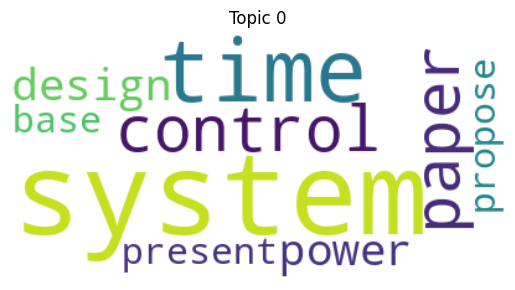

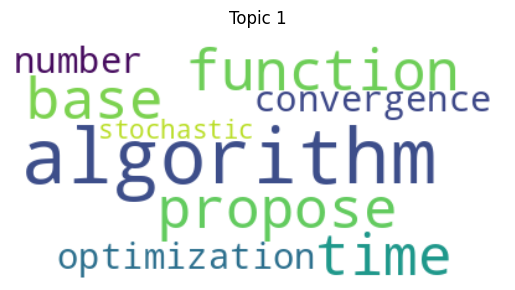

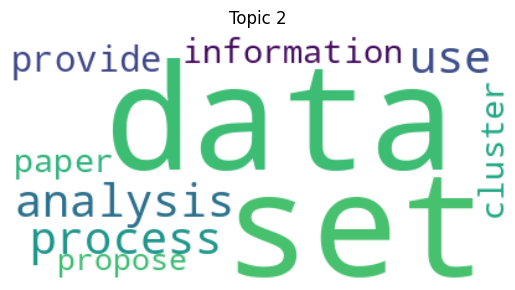

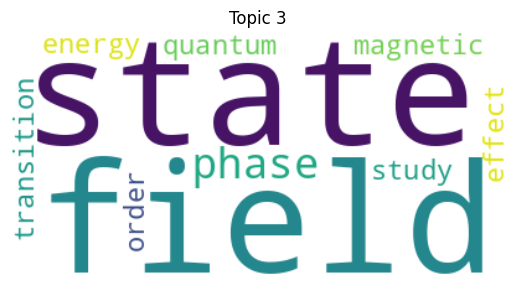

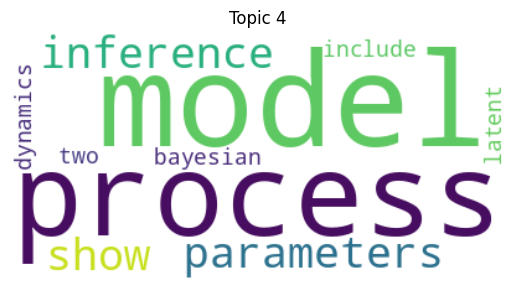

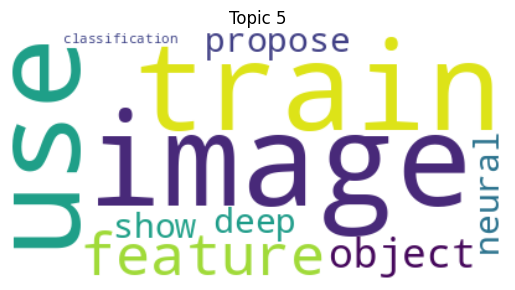

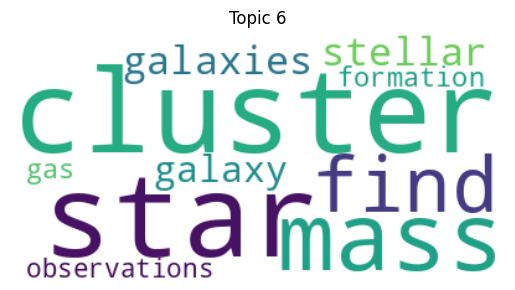

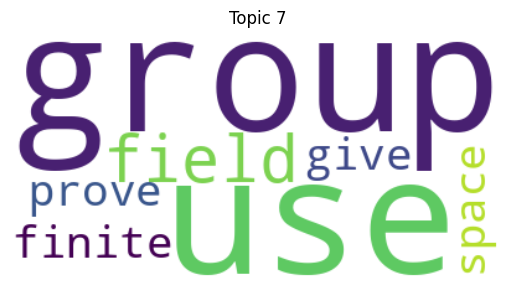

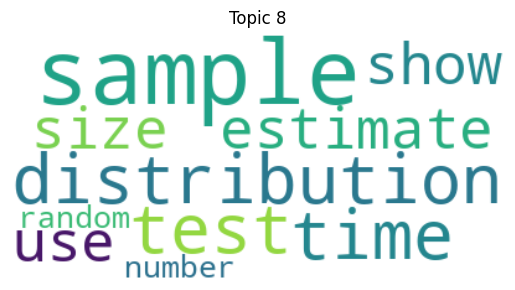

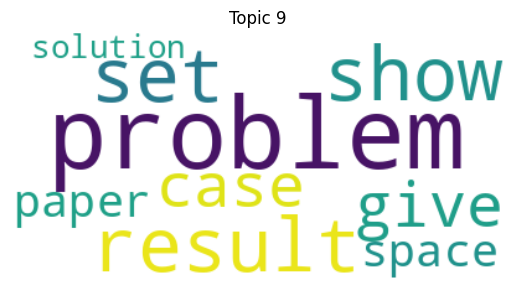

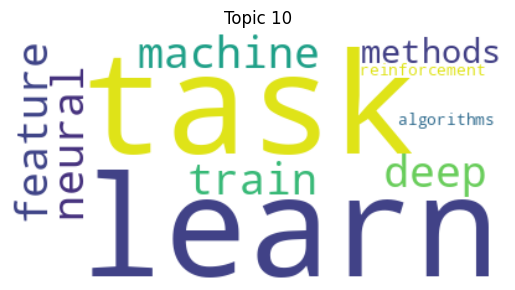

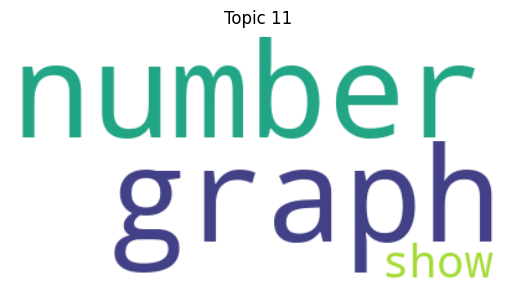

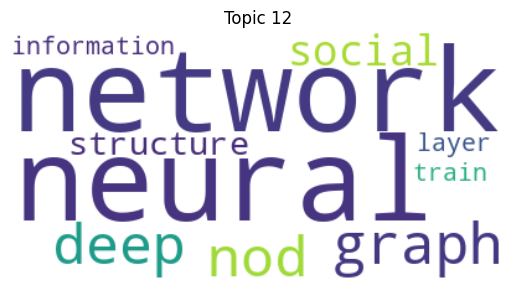

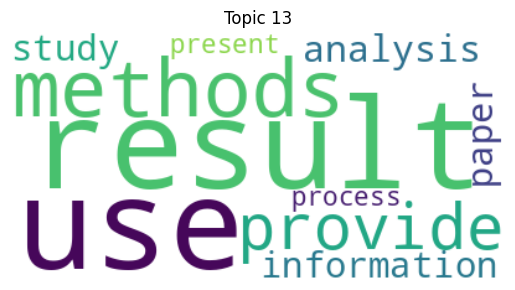

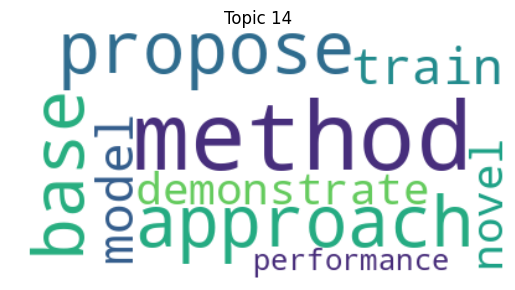

In [ ]:
# Visualize topics with word clouds
def visualize_topics(filtered_topics):
    for topic_id, words in enumerate(filtered_topics):
        wordcloud = WordCloud(background_color='white').generate(' '.join(words))
        plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_id}')
        plt.axis('off')
        plt.show()

# Visualize filtered topics with word clouds
visualize_topics(filtered_topics)


### Documentation Topic Distribution

In [ ]:
# Get the document-topic distribution
doc_topic_dist = [nmf_model[doc] for doc in corpus]

# Topic distribution for the first document
print(f"Document 0 topic distribution: {doc_topic_dist[0]}")

Document 0 topic distribution: [(2, 0.2377738461530303), (3, 0.02343586480468523), (4, 0.10218156367817798), (5, 0.060089213814104044), (7, 0.061625963411438424), (8, 0.12630213107908791), (13, 0.31748373991429873), (14, 0.07110767714517739)]


In [ ]:
# Print the document-topic distribution in a structured format
def print_doc_topic_distribution(doc_topic_dist):
    for doc_id, topic_dist in enumerate(doc_topic_dist):
        print(f"Document {doc_id} topic distribution:")
        for topic_id, topic_prob in topic_dist:
            print(f"Topic {topic_id}: Probability {topic_prob:.4f}")
        print("--------------------------")  # Add a blank line for clarity

# Print the modified document-topic distribution
print_doc_topic_distribution(doc_topic_dist)


Streaming output truncated to the last 5000 lines.
Topic 5: Probability 0.0375
Topic 7: Probability 0.0384
Topic 9: Probability 0.0159
Topic 13: Probability 0.5114
--------------------------
Document 20407 topic distribution:
Topic 2: Probability 0.3192
Topic 4: Probability 0.3748
Topic 5: Probability 0.0459
Topic 8: Probability 0.0900
Topic 10: Probability 0.0808
Topic 12: Probability 0.0694
Topic 14: Probability 0.0199
--------------------------
Document 20408 topic distribution:
Topic 1: Probability 0.3376
Topic 2: Probability 0.0918
Topic 4: Probability 0.1215
Topic 8: Probability 0.0854
Topic 9: Probability 0.3597
--------------------------
Document 20409 topic distribution:
Topic 1: Probability 0.0903
Topic 2: Probability 0.1976
Topic 4: Probability 0.0358
Topic 10: Probability 0.1077
Topic 12: Probability 0.4627
Topic 14: Probability 0.1059
--------------------------
Document 20410 topic distribution:
Topic 0: Probability 0.0144
Topic 1: Probability 0.0160
Topic 2: Probability 0

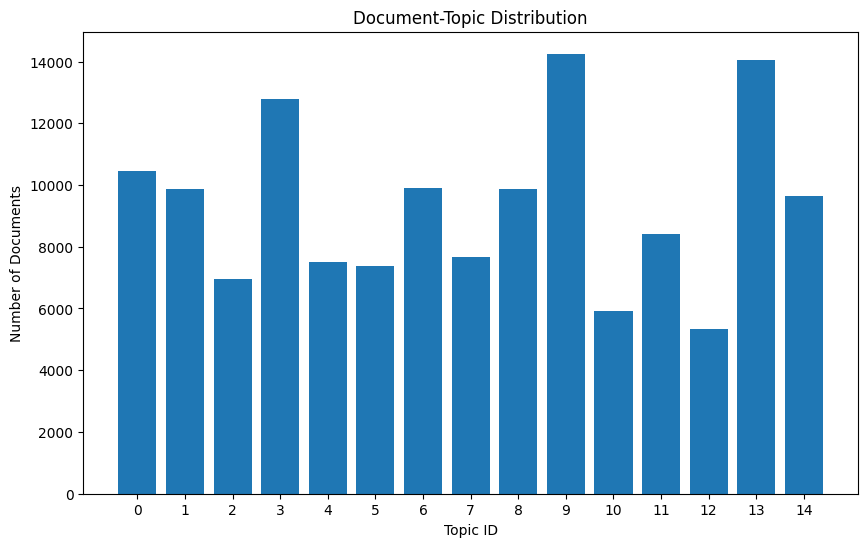

In [ ]:
# Visualize document-topic distribution using a bar chart
def visualize_doc_topic_distribution(doc_topic_dist):
    # Initialize an array to store topic counts
    topic_counts = np.zeros(nmf_model.num_topics)

    # Count occurrences of each topic for all documents
    for doc_topic_probs in doc_topic_dist:
        for topic_id, _ in doc_topic_probs:
            topic_counts[topic_id] += 1

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(range(nmf_model.num_topics), topic_counts)
    plt.xlabel('Topic ID')
    plt.ylabel('Number of Documents')
    plt.title('Document-Topic Distribution')
    plt.xticks(range(nmf_model.num_topics))
    plt.show()

# Example: Visualize the document-topic distribution
visualize_doc_topic_distribution(doc_topic_dist)

In [ ]:
# Identify dominant topics for each document
def identify_dominant_topics(doc_topic_dist):
    dominant_topics = []
    for doc_dist in doc_topic_dist:
        dominant_topic = max(doc_dist, key=lambda x: x[1])
        dominant_topics.append(dominant_topic)
    return dominant_topics

# Identify dominant topics for each document
dominant_topics = identify_dominant_topics(doc_topic_dist)
print("Dominant Topics for Each Document:")
for doc_id, dominant_topic in enumerate(dominant_topics):
    print(f"Document {doc_id}: Dominant Topic {dominant_topic[0]} with Probability {dominant_topic[1]:.4f}")


Streaming output truncated to the last 5000 lines.
Document 15972: Dominant Topic 14 with Probability 0.3530
Document 15973: Dominant Topic 13 with Probability 0.2662
Document 15974: Dominant Topic 9 with Probability 0.2399
Document 15975: Dominant Topic 9 with Probability 0.6312
Document 15976: Dominant Topic 6 with Probability 0.5363
Document 15977: Dominant Topic 10 with Probability 0.3531
Document 15978: Dominant Topic 11 with Probability 0.5278
Document 15979: Dominant Topic 3 with Probability 0.6186
Document 15980: Dominant Topic 11 with Probability 0.3987
Document 15981: Dominant Topic 14 with Probability 0.2754
Document 15982: Dominant Topic 3 with Probability 0.3475
Document 15983: Dominant Topic 11 with Probability 0.9740
Document 15984: Dominant Topic 6 with Probability 0.3059
Document 15985: Dominant Topic 3 with Probability 0.9771
Document 15986: Dominant Topic 12 with Probability 0.4899
Document 15987: Dominant Topic 1 with Probability 0.2401
Document 15988: Dominant Topi

In [ ]:
# Calculate the average probability of each topic across all documents
def calculate_avg_topic_probability(doc_topic_dist):
    num_documents = len(doc_topic_dist)
    avg_topic_probabilities = np.zeros(nmf_model.num_topics)

    # Sum the probabilities for each topic across all documents
    for doc_topic_probs in doc_topic_dist:
        for topic_id, topic_prob in doc_topic_probs:
            avg_topic_probabilities[topic_id] += topic_prob

    # Calculate the average probability for each topic
    avg_topic_probabilities /= num_documents
    return avg_topic_probabilities

# Calculate the average topic probability
avg_topic_probabilities = calculate_avg_topic_probability(doc_topic_dist)

for topic_id, avg_prob in enumerate(avg_topic_probabilities):
    print(f"Topic {topic_id}: Average Probability {avg_prob:.4f}")


Topic 0: Average Probability 0.0699
Topic 1: Average Probability 0.0554
Topic 2: Average Probability 0.0391
Topic 3: Average Probability 0.1437
Topic 4: Average Probability 0.0467
Topic 5: Average Probability 0.0366
Topic 6: Average Probability 0.0661
Topic 7: Average Probability 0.0313
Topic 8: Average Probability 0.0529
Topic 9: Average Probability 0.1460
Topic 10: Average Probability 0.0351
Topic 11: Average Probability 0.0525
Topic 12: Average Probability 0.0335
Topic 13: Average Probability 0.1349
Topic 14: Average Probability 0.0512


In [ ]:
print(len(doc_topic_dist))

20972


### Topic Labeling

In [ ]:
# Assign meaningful labels to topics based on representative words or documents
def label_topics(nmf_model, num_words=10, min_word_length=2):
    topic_labels = []
    for topic_id in range(nmf_model.num_topics):
        top_words = nmf_model.show_topic(topic_id, topn=num_words)
        filtered_words = [word for word, _ in top_words if len(word) > min_word_length]
        topic_labels.append(f"Topic {topic_id}: {' | '.join(filtered_words)}")
    return topic_labels

topic_labels = label_topics(nmf_model, num_words=10, min_word_length=2)

for label in topic_labels:
    print(label)

Topic 0: system | systems | time | control | paper | design | power | present | propose | base
Topic 1: function | algorithm | propose | algorithms | time | base | optimization | number | convergence | stochastic
Topic 2: data | set | analysis | use | process | provide | information | cluster | paper | propose
Topic 3: state | field | phase | magnetic | quantum | study | transition | energy | order | effect
Topic 4: model | process | parameters | inference | show | bayesian | dynamics | two | latent | include
Topic 5: image | train | use | feature | object | propose | deep | neural | show | classification
Topic 6: cluster | star | mass | find | galaxies | stellar | galaxy | formation | gas | observations
Topic 7: group | use | field | finite | give | prove | space
Topic 8: sample | distribution | test | time | estimate | use | show | size | number | random
Topic 9: problem | result | set | show | give | problems | case | space | paper | solution
Topic 10: learn | task | deep | machine 

In [ ]:
# Define new topic names based on the top words associated with each topic
new_topic_names = {
    0: "Number Theory",
    1: "Modeling and Inference",
    2: "Optimization and Methods",
    3: "Data Analysis and Clustering",
    4: "System Design and Performance",
    5: "Group Studies",
    6: "Time and Structures",
    7: "Sampling and Distribution",
    8: "Problem Sets and Conditions",
    9: "Image Processing and Methods",
    10: "Feature Learning and Applications",
    11: "Neural Networks and Social Learning",
    12: "Algorithmic Learning and Machine Problems",
    13: "Graph Structures and Randomization",
    14: "State Transitions and Quantum Effects"
}

# Map new topic names to the original topic labels
new_topic_labels = [new_topic_names.get(topic_id, f"Topic {topic_id}") for topic_id in range(len(topic_labels))]

# Print the new topic labels
for topic_id, topic_label in enumerate(new_topic_labels):
    print(f"Topic {topic_id}: {topic_label}")

Topic 0: Number Theory
Topic 1: Modeling and Inference
Topic 2: Optimization and Methods
Topic 3: Data Analysis and Clustering
Topic 4: System Design and Performance
Topic 5: Group Studies
Topic 6: Time and Structures
Topic 7: Sampling and Distribution
Topic 8: Problem Sets and Conditions
Topic 9: Image Processing and Methods
Topic 10: Feature Learning and Applications
Topic 11: Neural Networks and Social Learning
Topic 12: Algorithmic Learning and Machine Problems
Topic 13: Graph Structures and Randomization
Topic 14: State Transitions and Quantum Effects


### Topic Similarity

In [ ]:
# Calculate topic similarity using cosine similarity
def calculate_topic_similarity(nmf_model):
    topic_vectors = nmf_model.get_topics()
    similarity_matrix = cosine_similarity(topic_vectors)
    return similarity_matrix

# Example: Calculate topic similarity for NMF model
topic_similarity_matrix = calculate_topic_similarity(nmf_model)

# Print the similarity matrix
print("Topic Similarity Matrix:")
print(topic_similarity_matrix)


Topic Similarity Matrix:
[[1.         0.14351746 0.06230197 0.16618664 0.03817189 0.09835724
  0.09169619 0.02322751 0.12815595 0.14853868 0.06391615 0.06033425
  0.05898841 0.18295337 0.11389901]
 [0.14351746 1.         0.06039637 0.09043682 0.03145728 0.11009259
  0.08424034 0.05113639 0.14493226 0.17680974 0.06454006 0.08742386
  0.04492101 0.12322226 0.23210347]
 [0.06230197 0.06039637 1.         0.04915752 0.02447886 0.07592847
  0.05929781 0.02879769 0.08742515 0.08586234 0.05064684 0.03379514
  0.02822172 0.13789384 0.06353079]
 [0.16618664 0.09043682 0.04915752 1.         0.05029474 0.09932207
  0.27877819 0.10666877 0.17566986 0.24057461 0.04979507 0.11509097
  0.06954712 0.18134614 0.06065764]
 [0.03817189 0.03145728 0.02447886 0.05029474 1.         0.03534338
  0.03609369 0.04750702 0.05631651 0.05062402 0.02660564 0.01801963
  0.03317297 0.05847539 0.12213499]
 [0.09835724 0.11009259 0.07592847 0.09932207 0.03534338 1.
  0.09653491 0.09904812 0.12107175 0.12370957 0.1526995

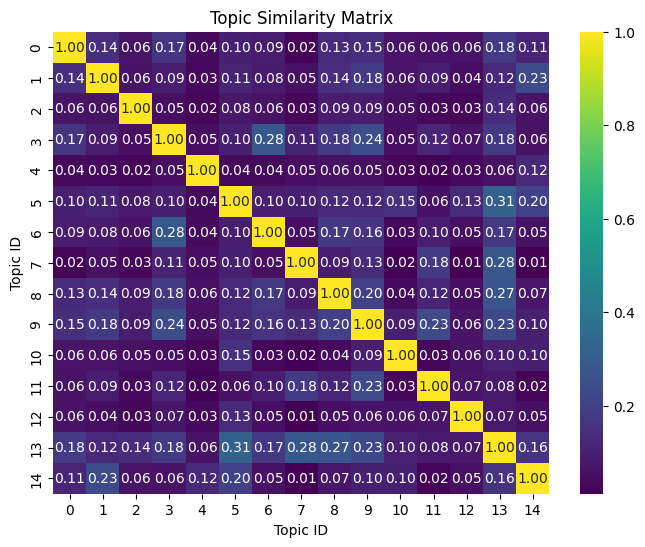

In [ ]:
# Visualize topic similarity matrix as a heatmap
def visualize_topic_similarity(topic_similarity_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(topic_similarity_matrix, cmap="viridis", annot=True, fmt=".2f", xticklabels=range(len(topic_similarity_matrix)), yticklabels=range(len(topic_similarity_matrix)))
    plt.xlabel("Topic ID")
    plt.ylabel("Topic ID")
    plt.title("Topic Similarity Matrix")
    plt.show()

# Visualize topic similarity matrix for NMF model
visualize_topic_similarity(topic_similarity_matrix)


### Model Evaluation

In [ ]:
import pandas as pd

assigned_topics = []
topic_probabilities = []

data = df[['TITLE', 'ABSTRACT']].copy()  # Make a copy to avoid SettingWithCopyWarning

for abstract in data['ABSTRACT']:
    bow = dictionary.doc2bow(abstract.split())
    topic_distribution = nmf_model.get_document_topics(bow)
    if topic_distribution:
        top_topic = max(topic_distribution, key=lambda item: item[1])[0]
        assigned_topics.append(top_topic)
        topic_probabilities.append(dict(topic_distribution))
    else:
        assigned_topics.append(None)
        topic_probabilities.append({})

data['Topic'] = assigned_topics

# Create new columns for each topic and assign probabilities
for topic in range(nmf_model.num_topics):
    data[f'Topic_{topic}_probability'] = [prob.get(topic, 0.0) for prob in topic_probabilities]

data.head()


,TITLE,ABSTRACT,Topic,Topic_0_probability,Topic_1_probability,Topic_2_probability,Topic_3_probability,Topic_4_probability,Topic_5_probability,Topic_6_probability,Topic_7_probability,Topic_8_probability,Topic_9_probability,Topic_10_probability,Topic_11_probability,Topic_12_probability,Topic_13_probability,Topic_14_probability
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,2.0,0.000000,0.056789,0.366638,0.088074,0.057034,0.084682,0.000000,0.000000,0.164733,0.102514,0.000000,0.000000,0.000000,0.000000,0.079537
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.501364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498636,0.000000,0.000000
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,3.0,0.000000,0.018493,0.000000,0.408987,0.000000,0.000000,0.068811,0.032042,0.084079,0.321323,0.014161,0.045309,0.000000,0.000000,0.000000
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,9.0,0.035545,0.181661,0.000000,0.160111,0.000000,0.021711,0.000000,0.000000,0.000000,0.555740,0.000000,0.000000,0.000000,0.000000,0.033943
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,13.0,0.000000,0.000000,0.381360,0.000000,0.000000,0.174665,0.019069,0.000000,0.000000,0.000000,0.042812,0.000000,0.000000,0.382094,0.000000


In [ ]:
# Adding assigned topics to the DataFrame
data['Topic'] = assigned_topics

# Save the data to a CSV file
data.to_csv('nmf_data_with_topics.csv', index=False)

In [ ]:
# Find NaN values in y_train
missing_values = y_train[y_train.isna()]
print("Missing values in y_train:", missing_values)

Missing values in y_train: Series([], Name: Topic, dtype: float64)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['ABSTRACT'], data['Topic'], test_size=0.2, random_state=42)

# Replace missing values in y_train with 0
y_train.fillna(0, inplace=True)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7113230035756853
              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69       359
         1.0       0.72      0.50      0.59       221
         2.0       0.70      0.66      0.68       223
         3.0       0.74      0.85      0.79       898
         4.0       0.69      0.51      0.59       133
         5.0       0.81      0.56      0.66       114
         6.0       0.92      0.68      0.78       260
         7.0       0.96      0.38      0.55        63
         8.0       0.76      0.55      0.64       152
         9.0       0.66      0.89      0.76       984
        10.0       1.00      0.03      0.05        38
        11.0       0.87      0.52      0.65        50
        12.0       0.76      0.64      0.69       121
        13.0       0.61      0.56      0.59       352
        14.0       0.66      0.64      0.65       227

    accuracy                           0.71      4195
   macro avg       0.77      0.57      0.62      41

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Save the model to a file using pickle
with open("nmf_model.pkl", 'wb') as file:
    pickle.dump(nmf_model, file)

print("NMF model saved successfully.")

# Save the dictionary to a pickle file
with open('nmf_dictionary.pkl', 'wb') as f:
    pickle.dump(dictionary, f)

NMF model saved successfully.


In [ ]:
# Define the file path for saving the components
output_file = "NMF_components.pkl"

# Create a dictionary to store all the components
components = {
    "nmf_model": nmf_model,
    "dictionary": dictionary,
    "topic_similarity_matrix": topic_similarity_matrix,
    "topic_probabilities": topic_probabilities,
    "tfidf_vectorizer": tfidf_vectorizer,
    "classifier": classifier,
    "new_topic_names": new_topic_names,
    "accuracy": accuracy
}

# Save the components to a pickle file
with open(output_file, "wb") as f:
    pickle.dump(components, f)

print("Model saved successfully.")

Model saved successfully.
